# Machine Learning Project

## Authors: Noel Chong, Mark Feng, Judy Kalenga, and Lucas Woolner

**Dataset Source: National Fire Database fire point data Dataset. Canadian Wildland Fire Information System. https://cwfis.cfs.nrcan.gc.ca/datamart/download/nfdbpnt.**

### National Fire Database fire point data Description

**Attributes for NFDB_point_20220901.txt dataset:**

Dataset Glossary

1. FID: Internal feature number.

2. SRC_AGENCY: Agency (province, territory, parks) from which the fire data has been obtained.

3. FIRE_ID: Agency fire ID.

4. FIRENAME: Agency firename.

5. LATITUDE: Latitude.

6. LONGITUDE: Longitude.

7. YEAR: Year of fire as provided by individual agencies.

8. MONTH: Month of fire as provided by individual agencies.

9. DAY: Day of fire as provided by individual agencies.

10. REP_DATE: Date associated with fire as reported by individual agency.

11. ATTK_DATE: *field description missing*

12. OUT_DATE: Date agency indicates fire is out or extinguished.

13. DECADE: *field description missing*

14. SIZE_HA: fire size (hectares) as reported by agency.

15. CAUSE: Cause of fire as reported by agency.

16. PROTZONE: Protection Zone as indicated by source agency. There is currently no official national standard that has been applied to this attribute.

17. FIRE_TYPE: Fire type as indicated by source agency. There is currently no official national standard that has been applied to this attribute.

18. MORE_INF: Additional attributes provided by agency.

19. CFS_REF_: *field description missing*

20. CFS_NOTE: Additional note added by CFS when compiling the NFDB.

21. CFS_NOTE: Additional note added by CFS when compiling the NFDB.

22. ACQ_DATE: Date that fire data was acquired from agency.

23. SRC_AGY2: *field description missing*

24. ECOZONE: Ecodistrict associated with fire point location. Data source The Ecological Framework of Canada: http://ecozones.ca/

25. ECOZ_REF: Ecozone reference id associated with fire point location. CFS divided Zone 5 and Zone 6 into west/east. Data source The Ecological Framework of Canada: http://ecozones.ca/.

26. ECOZ_NAME: Ecozone name associated with fire point location. CFS divided Zone 5 and Zone 6 into west/east. Data source The Ecological Framework of Canada: http://ecozones.ca/.

27. ECOZ_NOM: Ecozone name (FR) associated with fire point location. CFS divided Zone 5 and Zone 6 into west/east. Data source The Ecological Framework of Canada: http://ecozones.ca/.4. 


In [1]:
# import libraries 
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score,  precision_score, recall_score, f1_score
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

### Load the dataset

In [2]:
data_source = "C:/Users/Owner/Downloads/NFDB_point_txt/NFDB_point_20220901.txt"
raw_data = pd.read_csv(data_source, sep=',')
raw_data.head().transpose()  # peek at the first 5 rows

C:\Users\Owner\AppData\Local\Temp\ipykernel_20852\2498550749.py:2: DtypeWarning: Columns (10,11,24) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_data = pd.read_csv(data_source, sep=',')


,0,1,2,3,4
FID,0,1,2,3,4
SRC_AGENCY,BC,BC,BC,BC,BC
FIRE_ID,1953-G00041,1950-R00028,1950-G00026,1951-R00097,1952-G00116
FIRENAME,,,,,
LATITUDE,59.963,59.318,59.876,59.76,59.434
LONGITUDE,-128.172,-132.172,-131.922,-132.808,-126.172
YEAR,1953,1950,1950,1951,1952
MONTH,5,6,6,7,6
DAY,26,22,4,15,12
REP_DATE,1953-05-26 00:00:00,1950-06-22 00:00:00,1950-06-04 00:00:00,1951-07-15 00:00:00,1952-06-12 00:00:00


### Feature selection

In [3]:
data = raw_data[['YEAR','MONTH', 'DAY', 'LATITUDE','LONGITUDE']]
data

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
0,1953,5,26,59.96300,-128.172000
1,1950,6,22,59.31800,-132.172000
2,1950,6,4,59.87600,-131.922000
3,1951,7,15,59.76000,-132.808000
4,1952,6,12,59.43400,-126.172000
...,...,...,...,...,...
423826,2021,7,8,59.61015,-113.985117
423827,2021,3,4,49.11120,-113.836000
423828,2021,3,17,49.11220,-113.840500
423829,2021,9,18,49.04630,-113.916300


In [4]:
# since dataset is quite large at this point, narrowing the data to within the last 25 years (2001-2021, instead of 1930-2021)
data = data[data['YEAR'] > 2000]

In [5]:
data

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
105315,2005,6,20,55.80000,-124.816700
109890,2001,5,6,59.83920,-127.450000
109891,2001,5,6,59.80420,-127.478000
109892,2001,5,6,59.92270,-128.514300
109899,2003,7,1,59.24480,-131.916800
...,...,...,...,...,...
423826,2021,7,8,59.61015,-113.985117
423827,2021,3,4,49.11120,-113.836000
423828,2021,3,17,49.11220,-113.840500
423829,2021,9,18,49.04630,-113.916300


In [6]:
data.info() # quick description of the data, the total number of rows, each attribute’s type, and the number of non-null values >> conclusion: all features are numerical 

<class 'pandas.core.frame.DataFrame'>
Index: 138701 entries, 105315 to 423830
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   YEAR       138701 non-null  int64  
 1   MONTH      138701 non-null  int64  
 2   DAY        138701 non-null  int64  
 3   LATITUDE   138701 non-null  float64
 4   LONGITUDE  138701 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 6.3 MB


In [7]:
data.describe() # summary of the numerical attributes

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
count,138701.000000,138701.000000,138701.000000,138701.000000,138701.000000
mean,2010.198225,6.405275,15.173914,52.006245,-102.256983
std,6.007177,1.824690,9.094760,4.706613,20.695305
min,2001.000000,0.000000,0.000000,0.000000,-166.044000
25%,2005.000000,5.000000,7.000000,49.120800,-118.509500
50%,2010.000000,7.000000,15.000000,51.396000,-111.227483
75%,2015.000000,8.000000,23.000000,55.116944,-85.692900
max,2021.000000,12.000000,31.000000,69.602500,116.188000


In [8]:
data[data['DAY'] == 0] # should get rid of these samples since the date and month are not valid

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
214149,2002,0,0,53.1668,-102.8540
214633,2002,0,0,52.3867,-102.4170
214700,2002,0,0,49.9825,-109.4280
218288,2002,0,0,53.9782,-105.8740
229675,2002,0,0,49.9752,-109.5790
...,...,...,...,...,...
423443,2008,0,0,45.2453,-81.5261
423448,2009,0,0,45.9047,-59.9878
423532,2009,0,0,42.0000,-72.0000
423534,2008,0,0,48.7835,-123.0010


In [9]:
valid_data = data[data['DAY'] != 0] # this data excludes samples with invalid date

In [10]:
valid_data.describe()

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
count,135933.000000,135933.000000,135933.000000,135933.000000,135933.000000
mean,2010.347576,6.535705,15.482900,51.971807,-102.350724
std,5.967695,1.595253,8.922721,4.735857,20.860087
min,2001.000000,1.000000,1.000000,0.000000,-166.044000
25%,2005.000000,5.000000,8.000000,49.090100,-118.617700
50%,2010.000000,7.000000,15.000000,51.287100,-111.849957
75%,2015.000000,8.000000,23.000000,55.106683,-84.591600
max,2021.000000,12.000000,31.000000,69.602500,116.188000


In [11]:
valid_data[valid_data['LATITUDE'] == 0] # I think need to get rid of these samples too

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
423480,2018,1,14,0.0,0.0
423481,2018,3,27,0.0,0.0
423482,2018,4,17,0.0,0.0
423483,2018,4,20,0.0,0.0
423484,2018,5,15,0.0,0.0
...,...,...,...,...,...
423643,2020,7,11,0.0,0.0
423683,2020,8,12,0.0,0.0
423695,2020,8,1,0.0,0.0
423702,2020,5,14,0.0,0.0


In [12]:
valid_data[valid_data['LONGITUDE'] == 0]

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
423480,2018,1,14,0.0,0.0
423481,2018,3,27,0.0,0.0
423482,2018,4,17,0.0,0.0
423483,2018,4,20,0.0,0.0
423484,2018,5,15,0.0,0.0
...,...,...,...,...,...
423643,2020,7,11,0.0,0.0
423683,2020,8,12,0.0,0.0
423695,2020,8,1,0.0,0.0
423702,2020,5,14,0.0,0.0


In [13]:
valid_data = valid_data[valid_data['LATITUDE'] != 0] # this data excludes samples with invalid location

In [14]:
valid_data.describe()

,YEAR,MONTH,DAY,LATITUDE,LONGITUDE
count,135787.000000,135787.000000,135787.000000,135787.000000,135787.000000
mean,2010.341977,6.535685,15.484045,52.027688,-102.460773
std,5.967979,1.594993,8.923117,4.420983,20.599401
min,2001.000000,1.000000,1.000000,41.915900,-166.044000
25%,2005.000000,5.000000,8.000000,49.094900,-118.623400
50%,2010.000000,7.000000,15.000000,51.295409,-111.879620
75%,2015.000000,8.000000,23.000000,55.109750,-84.733900
max,2021.000000,12.000000,31.000000,69.602500,116.188000


In [15]:
# raw data used to train the model 
valid_data = valid_data[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']]

**Note: final features selected for model training include month, day, latitude, and longitude.**

In [16]:
# check for duplicate rows
valid_data.duplicated().sum()

481

In [17]:
# delete duplicates 
unique_data = valid_data.drop_duplicates(inplace=False)
unique_data

,MONTH,DAY,LATITUDE,LONGITUDE
105315,6,20,55.80000,-124.816700
109890,5,6,59.83920,-127.450000
109891,5,6,59.80420,-127.478000
109892,5,6,59.92270,-128.514300
109899,7,1,59.24480,-131.916800
...,...,...,...,...
423826,7,8,59.61015,-113.985117
423827,3,4,49.11120,-113.836000
423828,3,17,49.11220,-113.840500
423829,9,18,49.04630,-113.916300


In [18]:
# confirming there are no duplicates
unique_data.duplicated().sum()

0

In [19]:
# the number of missing values in each column
unique_data.isna().sum()

MONTH        0
DAY          0
LATITUDE     0
LONGITUDE    0
dtype: int64

In [20]:
# number of instances if sampled 5% of the data
len(unique_data) * 0.05

6765.3

In [21]:
# randomly sample 5% of the data
data_sample = unique_data.sample(n=6765, random_state=42) 
data_sample

,MONTH,DAY,LATITUDE,LONGITUDE
140646,5,13,55.125400,-127.780800
194732,10,23,56.586667,-111.319883
210594,8,30,51.404567,-115.057733
216693,8,28,56.509800,-109.412000
407027,7,27,60.583300,-108.583300
...,...,...,...,...
148322,7,2,51.524900,-117.308800
184690,6,7,55.915000,-115.652667
371433,8,19,47.730500,-70.276000
132484,7,23,49.973600,-116.182800


In [22]:
data_sample.describe()

,MONTH,DAY,LATITUDE,LONGITUDE
count,6765.000000,6765.000000,6765.000000,6765.000000
mean,6.511899,15.568367,52.065754,-102.390293
std,1.594931,8.970644,4.380758,20.532204
min,1.000000,1.000000,41.931900,-141.000000
25%,5.000000,8.000000,49.133300,-118.515600
50%,7.000000,15.000000,51.412800,-111.662500
75%,8.000000,23.000000,55.072783,-84.803706
max,12.000000,31.000000,69.602500,-52.680000


### Data synthesis (no fire instances)

**Note: dataset prior to processing only contained fire instances**

In [23]:
sample_latitudes = data_sample['LATITUDE']
sample_longitudes = data_sample['LONGITUDE']

In [24]:
# define ranges
months_range = range(1, 13)
days_range = range(1, 32)
latitude_range = sample_latitudes.unique() # using values present in the data already (from data_sample)
longitude_range = sample_longitudes.unique()

In [25]:
longitude_range

array([-127.7808  , -111.319883, -115.057733, ...,  -70.276   ,
       -116.1828  ,  -79.5728  ])

In [26]:
len(latitude_range) * 0.05

331.25

In [27]:
# randomly sample 5% of latitudes from the data (sampling with replacement to increase diversity)
latitude_range = np.random.choice(latitude_range, size=331)
len(latitude_range)

331

In [28]:
len(longitude_range) * 0.05

334.40000000000003

In [29]:
# randomly sample 5% of longitudes from the data (sampling with replacement)
longitude_range = np.random.choice(longitude_range, size=334)
len(longitude_range)

334

In [30]:
# generate possible combinations of months, days, latitudes, and longitudes (sample space)
possible_combinations = np.array(list(itertools.product(months_range, days_range, latitude_range, longitude_range)))
possible_combinations

array([[   1.      ,    1.      ,   60.057166, -119.4333  ],
       [   1.      ,    1.      ,   60.057166,  -65.76503 ],
       [   1.      ,    1.      ,   60.057166,  -90.1308  ],
       ...,
       [  12.      ,   31.      ,   54.315   , -114.96765 ],
       [  12.      ,   31.      ,   54.315   , -116.319   ],
       [  12.      ,   31.      ,   54.315   , -115.552   ]])

In [31]:
len(possible_combinations)

41126088

In [32]:
# generate dataframe of possible combinations 
possible_df = pd.DataFrame(possible_combinations, columns=['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE'])
possible_df

,MONTH,DAY,LATITUDE,LONGITUDE
0,1.0,1.0,60.057166,-119.433300
1,1.0,1.0,60.057166,-65.765030
2,1.0,1.0,60.057166,-90.130800
3,1.0,1.0,60.057166,-66.166320
4,1.0,1.0,60.057166,-103.849183
...,...,...,...,...
41126083,12.0,31.0,54.315000,-92.362600
41126084,12.0,31.0,54.315000,-102.582750
41126085,12.0,31.0,54.315000,-114.967650
41126086,12.0,31.0,54.315000,-116.319000


In [33]:
# shuffle the data 
possible_df = possible_df.sample(n=41126088, random_state=42)
possible_df

,MONTH,DAY,LATITUDE,LONGITUDE
10406386,4.0,2.0,59.587200,-89.605600
28872660,9.0,14.0,50.292270,-105.023700
11259833,4.0,9.0,60.398611,-73.886190
18735435,6.0,15.0,51.639000,-119.308800
6702225,2.0,30.0,51.402900,-121.981800
...,...,...,...,...
26301898,8.0,21.0,52.495250,-117.685150
26735830,8.0,25.0,51.649817,-97.340000
35788921,11.0,14.0,60.066600,-102.938000
13315092,4.0,28.0,56.881200,-117.503621


In [34]:
possible_df.describe()

,MONTH,DAY,LATITUDE,LONGITUDE
count,4.112609e+07,4.112609e+07,4.112609e+07,4.112609e+07
mean,6.500000e+00,1.600000e+01,5.267678e+01,-1.004856e+02
std,3.452053e+00,8.944272e+00,4.476210e+00,2.132901e+01
min,1.000000e+00,1.000000e+00,4.347989e+01,-1.368728e+02
25%,3.750000e+00,8.000000e+00,4.927530e+01,-1.178827e+02
50%,6.500000e+00,1.600000e+01,5.220620e+01,-1.109066e+02
75%,9.250000e+00,2.400000e+01,5.564718e+01,-8.071970e+01
max,1.200000e+01,3.100000e+01,6.618330e+01,-5.317000e+01


In [35]:
possible_df.duplicated().sum()

2675424

In [36]:
# get rid of duplicates in possible combinations 
possible_df = possible_df.drop_duplicates(inplace=False)
possible_df.describe()

,MONTH,DAY,LATITUDE,LONGITUDE
count,3.845066e+07,3.845066e+07,3.845066e+07,3.845066e+07
mean,6.500000e+00,1.600000e+01,5.265324e+01,-1.004351e+02
std,3.452053e+00,8.944272e+00,4.477347e+00,2.134845e+01
min,1.000000e+00,1.000000e+00,4.347989e+01,-1.368728e+02
25%,3.750000e+00,8.000000e+00,4.929710e+01,-1.178685e+02
50%,6.500000e+00,1.600000e+01,5.210260e+01,-1.103435e+02
75%,9.250000e+00,2.400000e+01,5.542180e+01,-8.071970e+01
max,1.200000e+01,3.100000e+01,6.618330e+01,-5.317000e+01


In [37]:
possible_df.duplicated().sum()

0

In [38]:
len(raw_data[['MONTH', 'DAY', 'LATITUDE','LONGITUDE']])

423831

In [39]:
len(possible_df)

38450664

In [40]:
# the idea here: result_merge contains the rows from possible_df that are not present in rawData -- essentially performing a set difference operation, keeping only the rows that exist in the left DataFrame (possible_df) but not in the right DataFrame (raw_data)
result_merge = possible_df.merge(raw_data[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']], how='outer', indicator=True).loc[lambda x: x['_merge'] == 'left_only'].drop(columns=['_merge'])
result_merge.duplicated().sum()

0

In [41]:
result_merge

,MONTH,DAY,LATITUDE,LONGITUDE
0,4.0,2.0,59.587200,-89.605600
1,9.0,14.0,50.292270,-105.023700
2,4.0,9.0,60.398611,-73.886190
3,6.0,15.0,51.639000,-119.308800
4,2.0,30.0,51.402900,-121.981800
...,...,...,...,...
38450659,8.0,21.0,52.495250,-117.685150
38450660,8.0,25.0,51.649817,-97.340000
38450661,11.0,14.0,60.066600,-102.938000
38450662,4.0,28.0,56.881200,-117.503621


In [42]:
# randomly sample same amount as data_sample for no fire instances 
no_fire = result_merge.sample(n=6765, random_state=42) 
no_fire

,MONTH,DAY,LATITUDE,LONGITUDE
6670975,4.0,13.0,59.736276,-116.577200
33432735,8.0,25.0,52.495250,-66.166320
30008427,6.0,30.0,55.263417,-53.330000
19756373,7.0,31.0,59.280831,-64.882280
35809444,9.0,20.0,60.150600,-79.061730
...,...,...,...,...
24118531,8.0,8.0,53.313200,-115.552000
17641950,5.0,16.0,51.627900,-66.100193
7407098,5.0,27.0,45.250431,-53.170000
32627480,8.0,29.0,47.553960,-123.938500


In [43]:
no_fire.describe()

,MONTH,DAY,LATITUDE,LONGITUDE
count,6765.000000,6765.000000,6765.000000,6765.000000
mean,6.475979,15.741463,52.724265,-100.176074
std,3.445215,8.911308,4.458570,21.443126
min,1.000000,1.000000,43.479888,-136.872850
25%,4.000000,8.000000,49.337900,-117.796300
50%,6.000000,16.000000,52.147800,-109.936000
75%,9.000000,23.000000,55.647183,-80.674904
max,12.000000,31.000000,66.183300,-53.170000


In [44]:
# add labels
data_sample.insert(4, "FIRE", 1)
data_sample

,MONTH,DAY,LATITUDE,LONGITUDE,FIRE
140646,5,13,55.125400,-127.780800,1
194732,10,23,56.586667,-111.319883,1
210594,8,30,51.404567,-115.057733,1
216693,8,28,56.509800,-109.412000,1
407027,7,27,60.583300,-108.583300,1
...,...,...,...,...,...
148322,7,2,51.524900,-117.308800,1
184690,6,7,55.915000,-115.652667,1
371433,8,19,47.730500,-70.276000,1
132484,7,23,49.973600,-116.182800,1


In [45]:
# add labels
no_fire.insert(4, "FIRE", 0)
no_fire

,MONTH,DAY,LATITUDE,LONGITUDE,FIRE
6670975,4.0,13.0,59.736276,-116.577200,0
33432735,8.0,25.0,52.495250,-66.166320,0
30008427,6.0,30.0,55.263417,-53.330000,0
19756373,7.0,31.0,59.280831,-64.882280,0
35809444,9.0,20.0,60.150600,-79.061730,0
...,...,...,...,...,...
24118531,8.0,8.0,53.313200,-115.552000,0
17641950,5.0,16.0,51.627900,-66.100193,0
7407098,5.0,27.0,45.250431,-53.170000,0
32627480,8.0,29.0,47.553960,-123.938500,0


In [46]:
# dataset including both fire and no fire instances
dataset = pd.concat([data_sample, no_fire], keys=['sample', 'random'])
dataset

MONTH   DAY   LATITUDE   LONGITUDE  FIRE
sample 140646      5.0  13.0  55.125400 -127.780800     1
       194732     10.0  23.0  56.586667 -111.319883     1
       210594      8.0  30.0  51.404567 -115.057733     1
       216693      8.0  28.0  56.509800 -109.412000     1
       407027      7.0  27.0  60.583300 -108.583300     1
...                ...   ...        ...         ...   ...
random 24118531    8.0   8.0  53.313200 -115.552000     0
       17641950    5.0  16.0  51.627900  -66.100193     0
       7407098     5.0  27.0  45.250431  -53.170000     0
       32627480    8.0  29.0  47.553960 -123.938500     0
       16779679   12.0   2.0  49.184650  -60.917391     0

[13530 rows x 5 columns]

In [47]:
# checking for duplicates one more time
dataset.duplicated(keep='first', subset=['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']).sum()

0

### Feature scaling

In [48]:
months = dataset['MONTH']
days = dataset['DAY']
latitudes = dataset['LATITUDE']
longitudes = dataset['LONGITUDE']

# feature scaling using standardization
scaler = StandardScaler()
standardized_month = scaler.fit_transform(months.values.reshape(-1, 1))
standardized_days = scaler.fit_transform(days.values.reshape(-1, 1))
standardized_latitude = scaler.fit_transform(latitudes.values.reshape(-1, 1))
standardized_longitude = scaler.fit_transform(longitudes.values.reshape(-1, 1))
standardized_info = [standardized_month, standardized_days, standardized_latitude, standardized_longitude]
standardized_data = pd.DataFrame(np.array(standardized_info).reshape(4, -1))
standardized_data.index =['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']
standardized_data.duplicated().sum()

0

In [49]:
dataset['FIRE'].values

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [50]:
standardized_data

,0,1,2,3,4,5,6,7,8,9,...,13520,13521,13522,13523,13524,13525,13526,13527,13528,13529
MONTH,-0.556530,1.306095,0.561045,0.561045,0.188520,-0.184005,0.933570,-1.301580,0.188520,0.561045,...,1.678620,1.306095,-1.674105,-2.046630,2.051146,0.561045,-0.556530,-0.556530,0.561045,2.051146
DAY,-0.296944,0.821526,1.604455,1.380761,1.268914,-1.527262,-1.415415,-1.079874,1.604455,-0.408791,...,-0.520638,-0.856179,0.821526,0.038597,-0.632485,-0.856179,0.038597,1.268914,1.492608,-1.527262
LATITUDE,0.616097,0.945823,-0.223488,0.928478,1.847640,1.828844,-1.285668,0.951878,-0.730817,-0.934395,...,-0.378859,-0.612626,-0.542551,-0.759746,-0.055781,0.207184,-0.173094,-1.612132,-1.092355,-0.724399
LONGITUDE,-1.260577,-0.477478,-0.655300,-0.386714,-0.347290,-0.495561,1.060048,-0.635051,0.382478,0.495003,...,-1.117096,-0.789016,-0.736583,-0.863459,-0.728128,-0.678814,1.673768,2.288899,-1.077786,1.920331


In [51]:
# add labels again
standardized_data.loc["FIRE"] = dataset['FIRE'].values
standardized_data

,0,1,2,3,4,5,6,7,8,9,...,13520,13521,13522,13523,13524,13525,13526,13527,13528,13529
MONTH,-0.556530,1.306095,0.561045,0.561045,0.188520,-0.184005,0.933570,-1.301580,0.188520,0.561045,...,1.678620,1.306095,-1.674105,-2.046630,2.051146,0.561045,-0.556530,-0.556530,0.561045,2.051146
DAY,-0.296944,0.821526,1.604455,1.380761,1.268914,-1.527262,-1.415415,-1.079874,1.604455,-0.408791,...,-0.520638,-0.856179,0.821526,0.038597,-0.632485,-0.856179,0.038597,1.268914,1.492608,-1.527262
LATITUDE,0.616097,0.945823,-0.223488,0.928478,1.847640,1.828844,-1.285668,0.951878,-0.730817,-0.934395,...,-0.378859,-0.612626,-0.542551,-0.759746,-0.055781,0.207184,-0.173094,-1.612132,-1.092355,-0.724399
LONGITUDE,-1.260577,-0.477478,-0.655300,-0.386714,-0.347290,-0.495561,1.060048,-0.635051,0.382478,0.495003,...,-1.117096,-0.789016,-0.736583,-0.863459,-0.728128,-0.678814,1.673768,2.288899,-1.077786,1.920331
FIRE,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
# shuffle data before partioning 
standardized_data = standardized_data.transpose() # needs to be a design matrix shape (features as columns) in order to do the randomly sampling
standardized_data = standardized_data.sample(n=13530, random_state=42)
standardized_data # prepared data used for model training

,MONTH,DAY,LATITUDE,LONGITUDE,FIRE
2117,-0.929055,0.597832,-0.470718,-0.684189,1.0
7369,-1.674105,-1.639109,-0.379558,0.363844,0.0
5225,0.188520,0.485985,-1.013639,1.669432,1.0
399,-0.184005,-0.744332,2.137224,-1.025210,1.0
4878,0.188520,1.492608,3.019154,-1.232716,1.0
...,...,...,...,...,...
5191,-0.556530,-0.856179,-0.711029,-0.979914,1.0
13418,0.933570,-0.185097,0.860086,-0.736202,0.0
5390,0.188520,-1.415415,-0.384906,-0.827865,1.0
860,-1.301580,1.716302,-1.923284,1.680294,1.0


In [53]:
standardized_data.shape

(13530, 5)

### Partition the data

In [54]:
# split the data into 60% training set, 20% dev set, and 20% testing set
training_set = standardized_data[:8118]
dev_set = standardized_data[8118:10824]
test_set = standardized_data[10824:]

X_train = np.array(training_set[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']])
y_train = training_set['FIRE'].values
X_dev = np.array(dev_set[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']])
y_dev = dev_set['FIRE'].values
X_test = np.array(test_set[['MONTH', 'DAY', 'LATITUDE', 'LONGITUDE']])
y_test = test_set['FIRE'].values

### Model training and selection

In [55]:
# logistic regression 
lr_model = LogisticRegression()

# use GridSearchCV to find the optimal set of hyperparameters for the logistic model
lr_parameters = {
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [50, 100, 150, 200, 250],
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}

lr_gs = GridSearchCV(lr_model, lr_parameters, cv=5)

# train model on training set 
lr_gs.fit(X_train, y_train)

# optimal model
bestLR = lr_gs.best_estimator_

# optimal hyperparameters
print("Best Hyperparameters:", bestLR.get_params(), "\n")

# make predictions on the dev set
y_predict_bestLR = bestLR.predict(X_dev)

# evaluate performance on dev set
print('Training Accuracy: ', bestLR.score(X_train, y_train))
print('Test Accuracy: ', accuracy_score(y_dev, y_predict_bestLR))
print('Precision: ', precision_score(y_dev, y_predict_bestLR))
print('Recall: ', recall_score(y_dev, y_predict_bestLR))
print("F1-score: ", f1_score(y_dev, y_predict_bestLR))

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserW

Best Hyperparameters: {'C': 0.001, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 

Training Accuracy:  0.5516136979551614
Test Accuracy:  0.5728011825572801
Precision:  0.5612307692307692
Recall:  0.6730627306273063
F1-score:  0.6120805369127517


C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:1193: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1050 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache

In [56]:
# neural network 
nn_model = MLPClassifier(activation= 'logistic', solver='lbfgs', alpha=0.1, random_state=1, max_iter=2000) # define model
nn_model.fit(X_train, y_train) # train

y_predict_nn = nn_model.predict(X_dev) # test

# evalutate
print('Training Accuracy: ', nn_model.score(X_train, y_train))
print('Test Accuracy: ', accuracy_score(y_dev, y_predict_nn))
print('Precision: ', precision_score(y_dev, y_predict_nn))
print('Recall: ', recall_score(y_dev, y_predict_nn))
print("F1-score: ", f1_score(y_dev, y_predict_nn))

Training Accuracy:  0.8540280857354028
Test Accuracy:  0.827420546932742
Precision:  0.7894393741851369
Recall:  0.8937269372693727
F1-score:  0.8383523710626514


In [57]:
# decision tree 
dt_model = tree.DecisionTreeClassifier()

dt_parameters = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'] #Could add more params but I don't understand them oof
}

# model
dt_gs = GridSearchCV(dt_model, dt_parameters, cv=5)

# training
dt_gs.fit(X_train, y_train)

bestDT = dt_gs.best_estimator_

print("Best Hyperparameters:", bestDT.get_params(), "\n")

# test
y_predict_bestDT = bestDT.predict(X_dev)

# evaluate
print('Training Accuracy: ', bestDT.score(X_train, y_train))
print('Test Accuracy: ', accuracy_score(y_dev, y_predict_bestDT))
print('Precision: ', precision_score(y_dev, y_predict_bestDT))
print('Recall: ', recall_score(y_dev, y_predict_bestDT))
print("F1-score: ", f1_score(y_dev, y_predict_bestDT))

Best Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'} 

Training Accuracy:  1.0
Test Accuracy:  0.7908351810790836
Precision:  0.7844268204758471
Recall:  0.8029520295202952
F1-score:  0.7935813274981764


In [61]:
# k-nearest neighbours 
knn_model = KNeighborsClassifier(n_neighbors=5) # define model
knn_parameters = {
    'n_neighbors': [5, 7, 11, 13, 17],
    'weights': ['uniform', 'distance'],
    'p': [1, 2] #Could add more params but I don't understand them oof
}
knn_gs = GridSearchCV(knn_model, knn_parameters, cv=5)

# training
knn_gs.fit(X_train, y_train)

bestKNN = knn_gs.best_estimator_

print("Best Hyperparameters:", bestKNN.get_params(), "\n")

# test
y_predict_bestKNN = bestKNN.predict(X_dev)

# evaluate
print('Training Accuracy: ', bestKNN.score(X_train, y_train))
print('Test Accuracy: ', accuracy_score(y_dev, y_predict_bestKNN))
print('Precision: ', precision_score(y_dev, y_predict_bestKNN))
print('Recall: ', recall_score(y_dev, y_predict_bestKNN))
print("F1-score: ", f1_score(y_dev, y_predict_bestKNN))

Best Hyperparameters: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 11, 'p': 1, 'weights': 'distance'} 

Training Accuracy:  1.0
Test Accuracy:  0.820029563932003
Precision:  0.7732997481108312
Recall:  0.9062730627306274
F1-score:  0.834522595990486


### Model evaluation

**Chosen model: KNN**

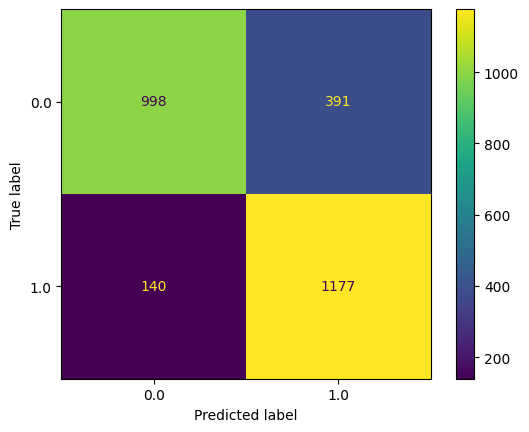

In [59]:
# test model against test set by making predictions 
y_predict = bestKNN.predict(X_test)

# evaluate model on test set
ConfusionMatrixDisplay.from_predictions(y_test, y_predict) # confusion matrix 

In [60]:
# classification report 
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.88      0.72      0.79      1389
         1.0       0.75      0.89      0.82      1317

    accuracy                           0.80      2706
   macro avg       0.81      0.81      0.80      2706
weighted avg       0.82      0.80      0.80      2706



In [62]:
print('Training Accuracy: ', bestKNN.score(X_dev, y_dev))
print('Test Accuracy: ', accuracy_score(y_test, y_predict))
print('Precision: ', precision_score(y_test, y_predict))
print('Recall: ', recall_score(y_test, y_predict))
print("F1-score: ", f1_score(y_test, y_predict))

Training Accuracy:  0.820029563932003
Test Accuracy:  0.8037694013303769
Precision:  0.7506377551020408
Recall:  0.8936977980258163
F1-score:  0.8159445407279028
